<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/pca_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv('/content/customer_segmentation.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df=df.drop('ID', axis=1)

In [7]:
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [8]:
df["Income"]=df["Income"].fillna(df["Income"].mean())

In [9]:
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
dates = []
for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

In [13]:
max(dates), min(dates)

(datetime.date(2014, 6, 29), datetime.date(2012, 7, 30))

In [14]:
df["Age"]= 2015- df["Year_Birth"]

In [16]:
df["Annual_spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [17]:
df=df.rename(columns={"Income":"Annual_income", "Recency":"Purchase_Frequency"})

In [19]:
df=df[["Annual_income", "Annual_spending", "Age","Purchase_Frequency"]]

In [20]:
df.head()

,Annual_income,Annual_spending,Age,Purchase_Frequency
0,58138.0,1617,58,58
1,46344.0,27,61,38
2,71613.0,776,50,26
3,26646.0,53,31,26
4,58293.0,422,34,94


In [24]:
q1= df["Annual_income"].quantile(0.05)
q3= df["Annual_income"].quantile(0.95)
IQR= q3-q1
lower_bound= q1-1.5*IQR
upper_bound= q3+1.5*IQR
df_cleaned= df[(df.Annual_income>=lower_bound) & (df.Annual_income <= upper_bound)]

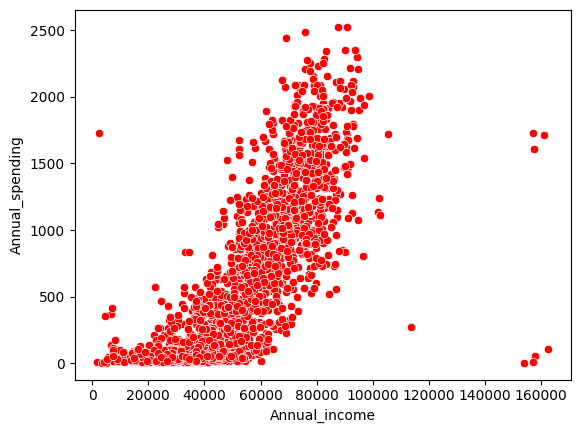

In [25]:
sns.scatterplot(data= df_cleaned, x="Annual_income", y="Annual_spending", color="red")
plt.show()

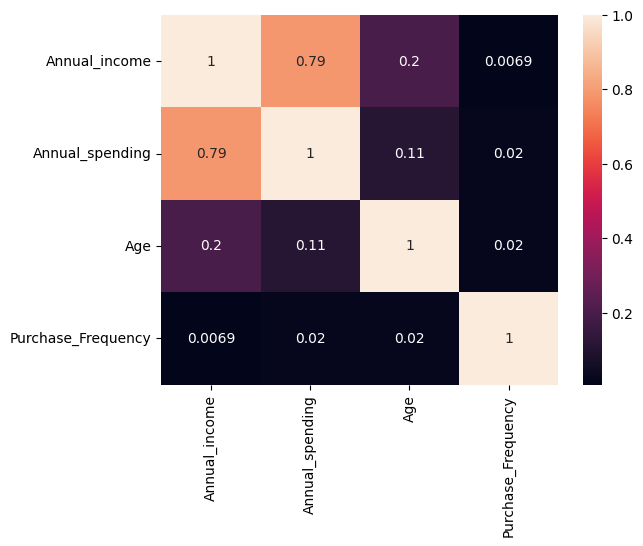

In [26]:
sns.heatmap(df_cleaned.corr(), annot=True)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df_scaled= ss.fit_transform(df)

In [28]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Annual_Income', 'Annual_Spending', 'Age', 'Purchase_Frequency']
df_scaled.head()

,Annual_Income,Annual_Spending,Age,Purchase_Frequency
0,0.235327,1.679417,0.985345,0.307039
1,-0.235826,-0.961275,1.235733,-0.383664
2,0.773633,0.282673,0.317643,-0.798086
3,-1.022732,-0.918094,-1.268149,-0.798086
4,0.241519,-0.305254,-1.017761,1.550305


In [31]:
from sklearn.cluster import KMeans
features= ["Annual_income", "Annual_spending", "Age", "Purchase_Frequency"]

In [34]:
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    clusters= kmeans.predict(df[features])
    print(f"Silhouette Score for k={k}: {silhouette_score(df[features], clusters)}

[np.float64(0.3085982998538054), np.float64(0.2596042038614497), np.float64(0.2636511270554696), np.float64(0.26540227476202854), np.float64(0.26773282602124737), np.float64(0.26935982590400437), np.float64(0.2654811674357404), np.float64(0.2558490392657089), np.float64(0.25918717126573393)]


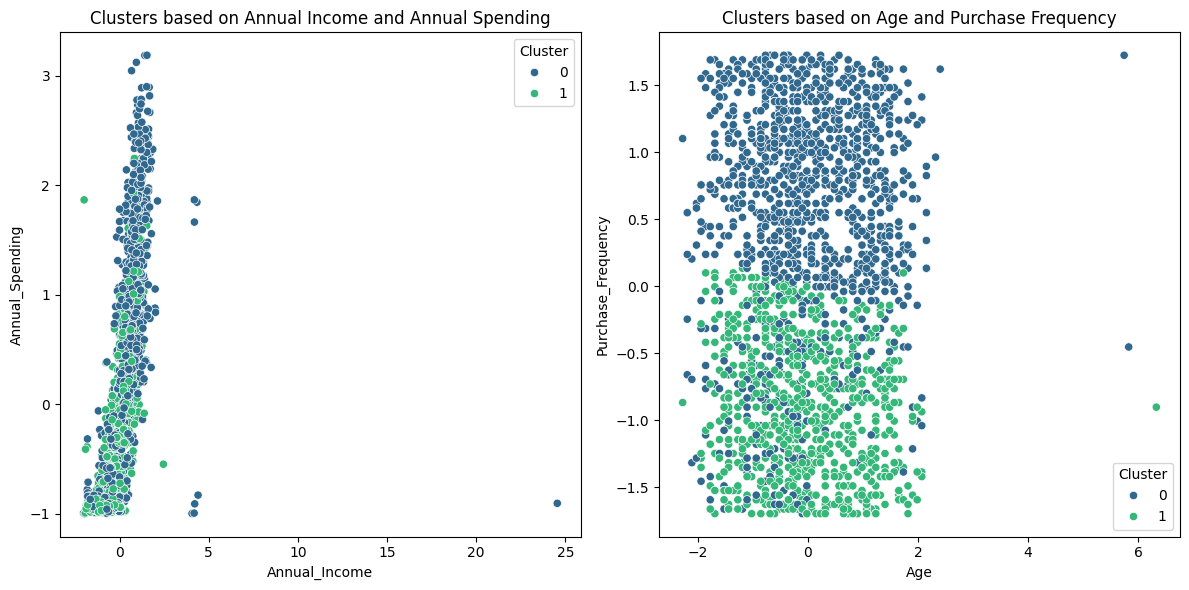

In [38]:
from sklearn.decomposition import PCA

In [39]:
scaler1= StandardScaler()
normalised_data= scaler1.fit_transform(df)

pca=PCA(n_components=2)
pca_data=pca.fit_transform(normalised_data)
pca_data

array([[ 1.56378959,  0.43501501],
       [-0.50108685,  0.01801205],
       [ 0.78765791, -0.75921947],
       ...,
       [ 0.61340678,  1.05884815],
       [ 0.97939507, -1.16501682],
       [-0.15713773,  0.05189303]])

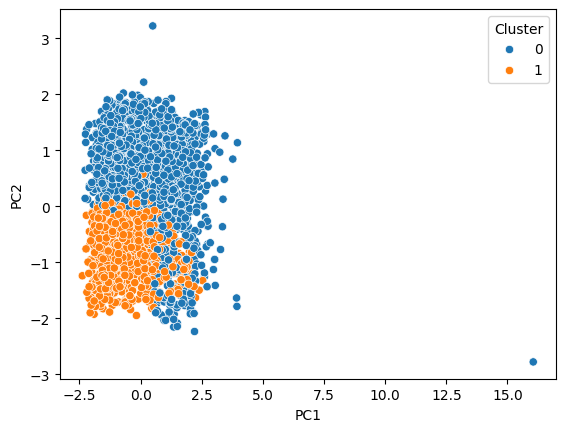

In [41]:
df_scaled["PC1"]= pca_data[:, 0]
df_scaled["PC2"]=pca_data[:, 1]
sns.scatterplot(df_scaled, x="PC1", y="PC2", hue="Cluster")
plt.show()